In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("undersampled_data.csv")
df

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantCountry,Zip,MCC,target
0,1750.0,0.0,2015.0,7.0,16.0,$21.42,Swipe Transaction,Lukass Theaters,Tiffin,USA,44883.000000,7832.0,No
1,1959.0,1.0,2016.0,5.0,5.0,$76.99,Chip Transaction,Jadens Wholesale,Lancaster,USA,93535.000000,5300.0,No
2,182.0,2.0,2012.0,11.0,23.0,$2.19,Swipe Transaction,Supermarket Chain 3,Houston,USA,77096.000000,5411.0,No
3,458.0,2.0,2019.0,5.0,15.0,$45.73,Chip Transaction,Supermarket Chain 3,Flint,USA,48532.000000,5411.0,No
4,1949.0,0.0,2018.0,1.0,4.0,$1.25,Chip Transaction,Convenience Store Chain 1,Brooklyn,USA,11213.000000,5499.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,1998.0,2.0,2013.0,1.0,26.0,$193.24,Swipe Transaction,Neufelder Tegucigalpa Wine and Liquor,Tegucigalpa,Honduras,51694.676895,5921.0,Yes
1740,1999.0,3.0,2020.0,1.0,26.0,$221.96,Swipe Transaction,Abrils Wholesale,Saint Louis,USA,63146.000000,5300.0,Yes
1741,1999.0,3.0,2020.0,1.0,26.0,$26.69,Swipe Transaction,Abrils Wholesale,Saint Louis,USA,63146.000000,5300.0,Yes
1742,1999.0,3.0,2020.0,1.0,26.0,$103.95,Chip Transaction,Cox Saint Louis Restaurant,Saint Louis,USA,63146.000000,5812.0,Yes


In [4]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [5]:
df["target"].value_counts()

No     872
Yes    872
Name: target, dtype: int64

In [6]:
df.isnull().sum()

User               0
Card               0
Year               0
Month              0
Day                0
Amount             0
UseChip            0
MerchantName       0
MerchantCity       0
MerchantCountry    0
Zip                0
MCC                0
target             0
dtype: int64

# Analyse the column Use chip and target based on swipe transaction,chip transaction and online transaction

In [7]:
import pandas as pd

# Create a cross-tabulation table
cross_tab = pd.crosstab(df['UseChip'], df['target'])

print("Cross-tabulation Table:")
print(cross_tab)


Cross-tabulation Table:
target               No  Yes
UseChip                     
Chip Transaction    236  184
Online Transaction   96  260
Swipe Transaction   540  428


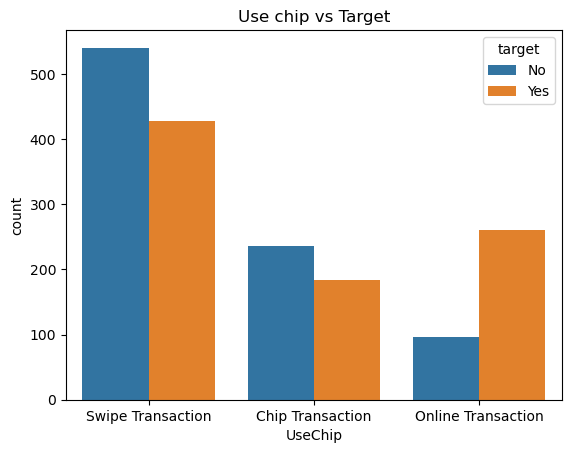

In [8]:
sns.countplot(x='UseChip', hue='target', data=df)
plt.title("Use chip vs Target")
plt.show()

In [9]:
df['FraudStatus'] = df['target'].apply(lambda x: 'Fraud' if x == 'Yes' else 'Not Fraud')


In [10]:
grouped_data = df.groupby(['Year', 'UseChip', 'FraudStatus']).size().reset_index(name='Count')


In [11]:
pivot_data = grouped_data.pivot_table(index='Year', columns=['UseChip', 'FraudStatus'], values='Count', fill_value=0)


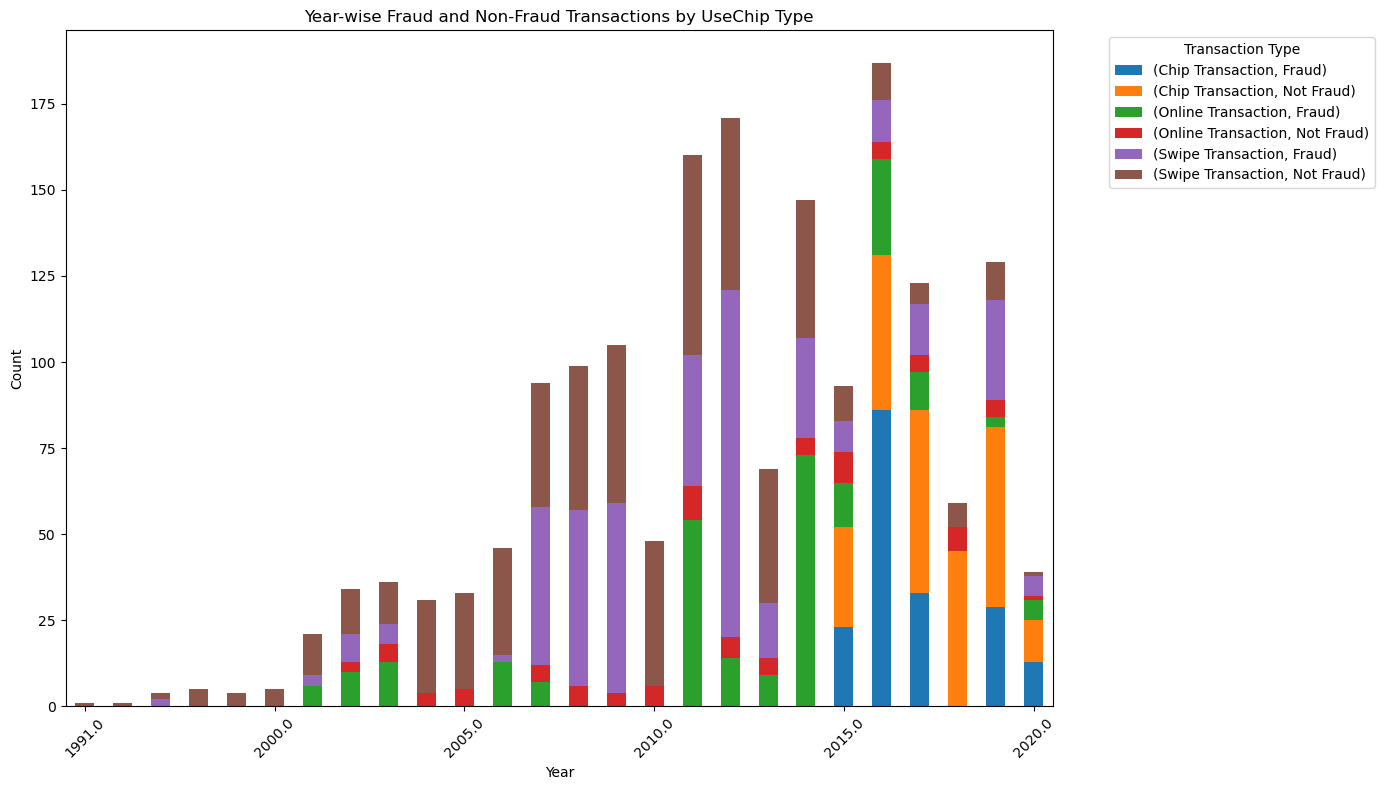

In [15]:
# Plot the data
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Fraud and Non-Fraud Transactions by UseChip Type')

# Show the legend
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust x-ticks to show fewer years (every 5th year in this example)
plt.xticks(ticks=range(0, len(pivot_data.index), 5), labels=[str(year) for year in pivot_data.index[::5]], rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

